In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from itertools import repeat
import folium
import math

# Разминка
## Импорт

In [26]:
data_name = 'data_gartseev'
df = pd.read_csv(f'./Data/{data_name}.csv')
df

,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),G(z),G(calibrated),Engine RPM(rpm),Speed (OBD)(km/h),Acceleration Sensor(Total)(g),Litres Per 100 Kilometer(Instant)(l/100km),Speed (GPS)(km/h),Acceleration Sensor(Z axis)(g)
0,Fri Mar 25 17:18:15 GMT+03:00 2016,25-Mar-2016 17:18:08.672,37.583105,55.848558,1.0,14.0,143.0,0.0,-1.069122,8.187592,4.949341,0.002015,-,0.0,0.002015,-,3.5999999046325684,0.405627
1,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.767,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.529938,8.353485,5.078201,0.027657,-,0.0,0.027657,-,3.5999999046325684,0.417656
2,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.867,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.483780,8.233429,4.653717,0.016112,-,0.0,0.016112,-,3.5999999046325684,0.374385
3,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.966,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.489288,8.442078,4.666107,0.015226,-,0.0,0.015226,-,3.5999999046325684,0.375648
4,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:09.067,37.583102,55.848554,1.0,14.0,143.0,0.0,-0.720825,8.725891,4.743317,0.034077,-,0.0,0.034077,-,3.5999999046325684,0.383519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.259,37.525679,55.738373,0.0,4.0,166.0,0.0,0.998703,9.563507,1.149261,0.006151,599.5,0.0,0.006151,-,0.0,0.017152
22277,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.358,37.525679,55.738373,0.0,4.0,166.0,0.0,1.070480,9.641998,1.154083,0.006844,601.25,0.0,0.006844,-,0.0,0.017644
22278,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.458,37.525679,55.738373,0.0,4.0,166.0,0.0,1.026428,9.537384,1.169113,0.006450,601.25,0.0,0.006450,-,0.0,0.019176
22279,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.557,37.525679,55.738373,0.0,4.0,166.0,0.0,0.681564,8.894714,1.603546,-0.057069,609.0,0.0,-0.057069,-,0.0,0.063460


In [27]:
df.columns

Index(['GPS Time', ' Device Time', ' Longitude', ' Latitude',
       'GPS Speed (Meters/second)', ' Horizontal Dilution of Precision',
       ' Altitude', ' Bearing', ' G(x)', ' G(y)', ' G(z)', ' G(calibrated)',
       'Engine RPM(rpm)', 'Speed (OBD)(km/h)', 'Acceleration Sensor(Total)(g)',
       'Litres Per 100 Kilometer(Instant)(l/100km)', 'Speed (GPS)(km/h)',
       'Acceleration Sensor(Z axis)(g)'],
      dtype='object')

In [28]:
def pull_time(string, unit, round_range):
    pattern = [r'\d\d:\d\d:\d\d\.\d+',r'\d\d:\d\d:\d\d']
    for i in pattern:
        time_str = re.search(i, string)
        if time_str is not None:
            time_str = time_str.group()
            break
    time = list(map(int,re.findall(r'\d+',time_str)))
    if len(time) == 4:
        ms = time[-1] + time[-2]*1000 + time[-3]*60*1000 + time[-4]*60*60*1000
        if unit == 'h':
            ans = 1.*ms/(1000*60*60)
        elif unit == 'm':
            ans = 1.*ms/(1000*60)
        elif unit == 's':
            ans = 1.*ms/(1000)
        elif unit == 'ms':
            ans = 1.*ms
    elif len(time) == 3:
        s = time[-1] + time[-2]*60 + time[-3]*60*60
        if unit == 'h':
            ans = 1.*s/(60*60)
        elif unit == 'm':
            ans = 1.*s/(60)
        elif unit == 's':
            ans = 1.*s
        elif unit == 'ms':
            ans = 1.*s*1000
    return round(ans,round_range)

#Словарь соответствия полей (столбцов) датафрейма
data_accord = {'GPS Time':'GPS Time',
               'Device Time':' Device Time',
               'Longitude':' Longitude',
               'Latitude':' Latitude',
               'GPS Speed (Meters/second)':'GPS Speed (Meters/second)',
               'Horizontal Dilution of Precision':' Horizontal Dilution of Precision',
               'Altitude':' Altitude',
               'Bearing':' Bearing',
               'G(x)':' G(x)',
               'G(y)':' G(y)',
               'G(z)':' G(z)',
               'G(calibrated)':' G(calibrated)',
               'Engine RPM(rpm)':'Engine RPM(rpm)',
               'Speed (OBD)(km/h)':'Speed (OBD)(km/h)',
               'Acceleration Sensor(Total)(g)':'Acceleration Sensor(Total)(g)',
               'Litres Per 100 Kilometer(Instant)(l/100km)':'Litres Per 100 Kilometer(Instant)(l/100km)',
               'Speed (GPS)(km/h)':'Speed (GPS)(km/h)',
               'Acceleration Sensor(Z axis)(g)':'Acceleration Sensor(Z axis)(g)'}
data_accord

{'GPS Time': 'GPS Time',
 'Device Time': ' Device Time',
 'Longitude': ' Longitude',
 'Latitude': ' Latitude',
 'GPS Speed (Meters/second)': 'GPS Speed (Meters/second)',
 'Horizontal Dilution of Precision': ' Horizontal Dilution of Precision',
 'Altitude': ' Altitude',
 'Bearing': ' Bearing',
 'G(x)': ' G(x)',
 'G(y)': ' G(y)',
 'G(z)': ' G(z)',
 'G(calibrated)': ' G(calibrated)',
 'Engine RPM(rpm)': 'Engine RPM(rpm)',
 'Speed (OBD)(km/h)': 'Speed (OBD)(km/h)',
 'Acceleration Sensor(Total)(g)': 'Acceleration Sensor(Total)(g)',
 'Litres Per 100 Kilometer(Instant)(l/100km)': 'Litres Per 100 Kilometer(Instant)(l/100km)',
 'Speed (GPS)(km/h)': 'Speed (GPS)(km/h)',
 'Acceleration Sensor(Z axis)(g)': 'Acceleration Sensor(Z axis)(g)'}

## Построение траектории

In [29]:
map_coord=df.copy()
# обьединяем широту долготу и добавляем в список
latitude = map_coord[data_accord['Latitude']].tolist()
longitude = map_coord[data_accord['Longitude']].tolist()
position = list(zip(latitude,longitude))

# создаем карту
mymap = folium.Map(location=(0,0), zoom_start=16)

# Добавляем границы карты включающий две точки максимумы и минимумы широты и долготы
bounds = [(min(latitude),min(longitude)),(max(latitude),max(longitude))]
mymap.fit_bounds(bounds)

# # Добавляем путь на карту, соединяющий все точки
folium.PolyLine(locations = position, color='#E04100').add_to(mymap)

# Сохраняем карту в файл HTML
#mymap.save(r'./Data/map.html')
mymap

## Построение скорости

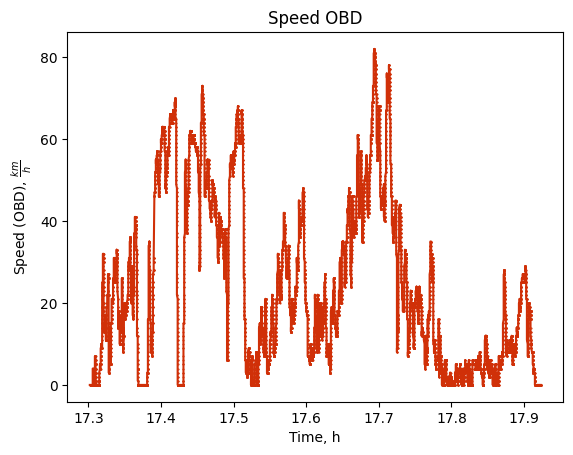

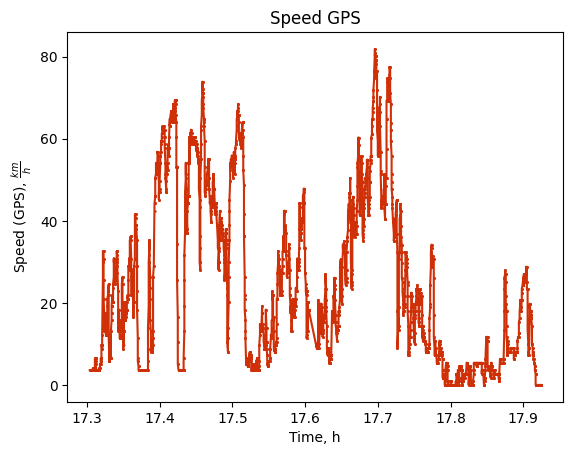

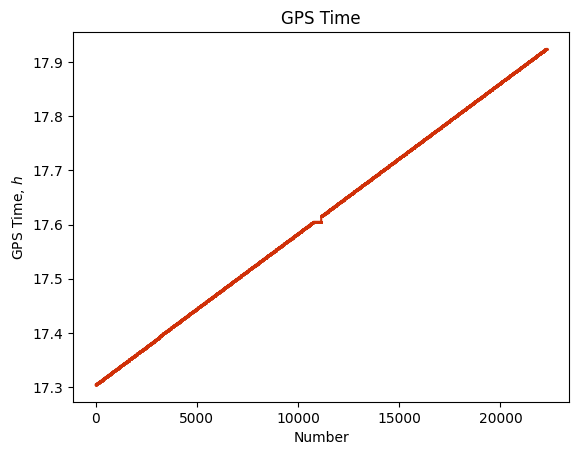

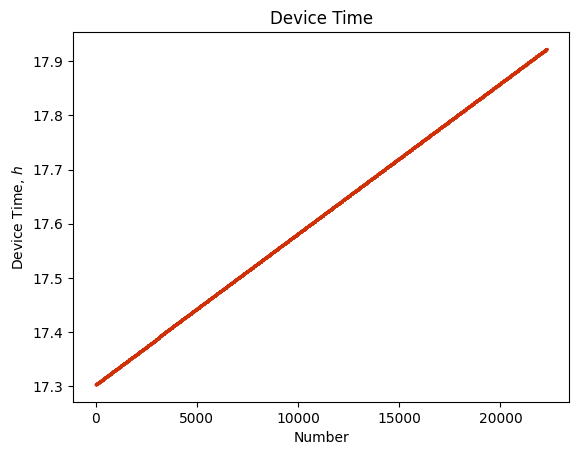

In [30]:
pass_symbol = '-'
unit = 'h' #Единицы измерения
#OBD
df1 = df[df[data_accord['Speed (OBD)(km/h)']] != pass_symbol]
x = list(map(pull_time,df1[data_accord['Device Time']].tolist(),repeat(unit),repeat(3)))
y = list(map(float,df[data_accord['Speed (OBD)(km/h)']].tolist()))

plt.plot(x,y, color='#D03008', marker = '.',markersize=1)
plt.xlabel(f'Time, {unit}') #Подпись для оси х
plt.ylabel(r'Speed (OBD), $\frac{km}{h}$') #Подпись для оси y
plt.title('Speed OBD') #Название
plt.show()

#GPS
df2 = df[df[data_accord['Speed (GPS)(km/h)']] != pass_symbol]
x = list(map(pull_time,df2[data_accord['GPS Time']].tolist(),repeat(unit),repeat(3)))
y = list(map(round,list(map(float,df2[data_accord['Speed (GPS)(km/h)']].tolist())),repeat(2)))

plt.plot(x,y, color='#D03008', marker = '.',markersize=1)
plt.xlabel(f'Time, {unit}') #Подпись для оси х
plt.ylabel(r'Speed (GPS), $\frac{km}{h}$') #Подпись для оси y
plt.title('Speed GPS') #Название
plt.show()

df3 = df[df[data_accord['GPS Time']] != pass_symbol]
y = list(map(pull_time,df3[data_accord['GPS Time']].tolist(),repeat(unit),repeat(3)))
x = range(len(y))

plt.plot(x,y, color='#D03008', marker = '.',markersize=1)
plt.xlabel(r'Number') #Подпись для оси х
plt.ylabel(r'GPS Time, $h$') #Подпись для оси y
plt.title('GPS Time') #Название
plt.show()

df4 = df[df[data_accord['Device Time']] != pass_symbol]
y = list(map(pull_time,df4[data_accord['Device Time']].tolist(),repeat(unit),repeat(3)))
x = range(len(y))

plt.plot(x,y, color='#D03008', marker = '.',markersize=1)
plt.xlabel(r'Number') #Подпись для оси х
plt.ylabel(r'Device Time, $h$') #Подпись для оси y
plt.title('Device Time') #Название
plt.show()

## Ориентация
Ориентация определяется только тогда, когда GPS-скорость ненулевая: берется начальная и конечная точки и строится вектор, по координатам которого можно определить ориентацию.
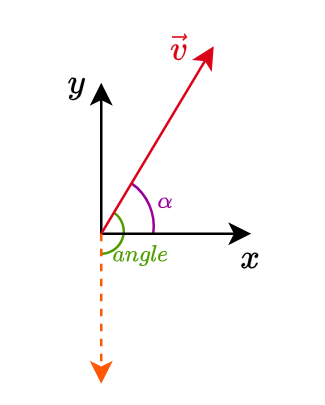


## Разложение скорости по 2-м координатам

In [11]:
def decompose_vel(velocity,angle): #Разложение скорости по компонентам с учетом углового смещения
    offset_angle = -90 #Градусов
    return [velocity*np.cos(np.deg2rad(angle+offset_angle)),velocity*np.sin(np.deg2rad(angle+offset_angle))]

In [12]:
decompose_vel(1,135)

[0.7071067811865476, 0.7071067811865476]

### Дополнение для тестов (Ориентация)





In [13]:
df_b = df[df[data_accord['Bearing']] == 0.0]
df_b.iloc[:,0:5].join(pd.DataFrame(df_b.iloc[:,13]).join(pd.DataFrame(df_b.iloc[:,16]))).to_csv('./Data/Bearing.csv', index=False)

# Часть 1

In [14]:
import numpy as np

class Gaussian:
    def __init__(self, mu=None, sigma2=None):
        self.mu = mu
        self.sigma2 = sigma2

    def get(self):
        return [self.mu, self.sigma2]

    def solve_eq(self, x):
        return 1/np.sqrt(2 * np.pi * self.sigma2)    *    np.exp(-0.5 * (x - self.mu) ** 2 / self.sigma2)

    def fill(self,n=100):
        x = np.linspace(self.mu-3*np.sqrt(self.sigma2),self.mu+3*np.sqrt(self.sigma2),n)
        y = []
        for i in x:
            y.append(self.solve_eq(i))
        y = np.array(y)
        return(np.array([x,y]))

    def mul(self, lst_gausses):
        if len(lst_gausses) == 0:
            return
        f_mu = lst_gausses[0].mu
        f_sigma2 = lst_gausses[0].sigma2
        n = len(lst_gausses)
        for i in range(1, n):
            g_mu = lst_gausses[i].mu
            g_sigma2 = lst_gausses[i].sigma2

            K = f_sigma2 / (f_sigma2 + g_sigma2)

            f_mu = f_mu + K * (g_mu - f_mu)
            f_sigma2 = f_sigma2 - K * f_sigma2

        self.mu = f_mu
        self.sigma2 = f_sigma2

class Kalman:
    def __init__(self, sigma2_e, F, keys_F, B, keys_B, keys_z):
        self.sigma2_e = sigma2_e
        self.x_ = np.array([0])
        self.sigma2 = np.array([0])
        self.index = 1

        self.F = F
        self.B = B
        self.keys_F = keys_F
        self.keys_B = keys_B

        self.keys_z = keys_z # {'RPM':[[measures_1],sigma2]}
    def predict(self):
        self.x_ = np.append(self.x_, self.F(self.keys_F, self.index)*self.x_[self.index-1]+self.B(self.keys_B, self.index))
        self.sigma2 = np.append(self.sigma2, self.F(self.keys_F, self.index)**2*self.sigma2[self.index-1]+self.sigma2_e)

    def get_measures(self):
        result = []
        for val in self.keys_z:
            if str(self.keys_z[val][0][self.index]) not in pass_symbol:
                result.append([float(self.keys_z[val][0][self.index]), self.keys_z[val][1]])
        return result

    def update(self):
        g_x_ = Gaussian(self.x_[self.index],self.sigma2[self.index])
        measures = self.get_measures()
        #print(measures)
        gaussians = []
        for i in measures:
            gaussians.append(Gaussian(i[0],i[1]))
        g_x_result = Gaussian()
        g_x_result.mul(gaussians)
        self.x_[self.index], self.sigma2[self.index] = g_x_result.get()

    def do(self):
        for i in range(1,len(list(self.keys_F.values())[0])):
            self.predict()
            self.update()
            self.index += 1
        return [self.x_,self.sigma2]


### Тестриуем умножение Гауссиан

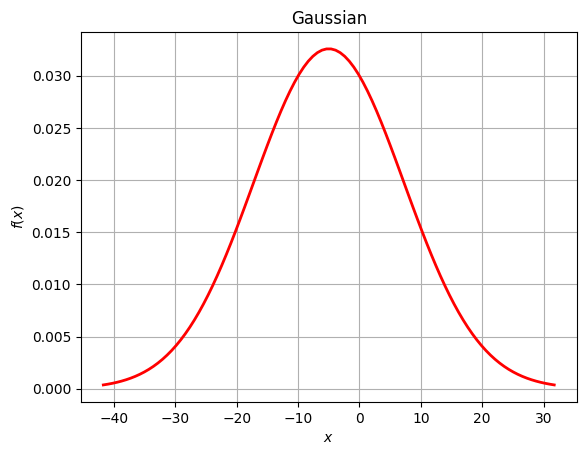

In [24]:
mu = -5
sigma = 150
g1 = Gaussian(mu,sigma)
coords = g1.fill(100)
plt.plot(coords[0], coords[1], 'red',linewidth= 2)
plt.title('Нормальное распределение') #Название
plt.grid(True)
plt.xlabel(r'$x$') #Подпись для оси х
plt.ylabel(r'$f(x)$') #Подпись для оси y
plt.title('Gaussian') #Название
plt.show()

mu, sigma2 =  [50.09505703422053, 7.585551330798481]


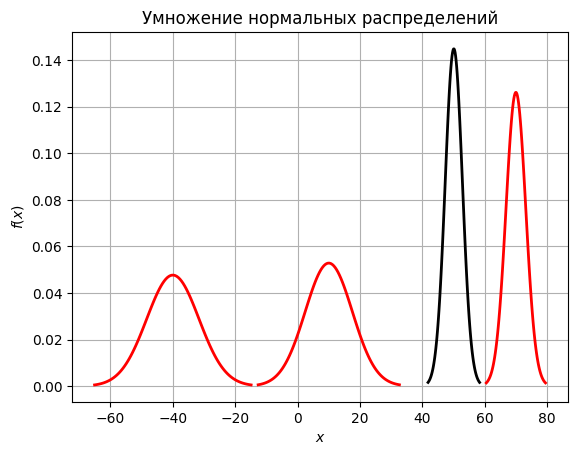

In [25]:
g1 = Gaussian(10,57)
g2 = Gaussian(-40,70)
g3 = Gaussian(70,10)
g4 = Gaussian()
g4.mul([g1,g2,g3])
print('mu, sigma2 = ',g4.get())
c1 = g1.fill(100)
c2 = g2.fill(100)
c3 = g3.fill(100)
c4 = g4.fill(100)
plt.plot(c1[0],c1[1], 'r',linewidth= 2)
plt.plot(c2[0],c2[1], 'r',linewidth= 2)
plt.plot(c3[0],c3[1], 'r',linewidth= 2)
plt.plot(c4[0],c4[1], 'black',linewidth= 2)
plt.title('Умножение нормальных распределений') #Название
plt.xlabel(r'$x$') #Подпись для оси х
plt.ylabel(r'$f(x)$') #Подпись для оси y
plt.grid(True)
plt.show()

### Ломаем данные

In [32]:
def crack(dataframe, start_time, end_time, interference):
    cracked_df_time = dataframe[data_accord["GPS Time"]]
    for i in range(len(cracked_df_time)):
        if start_time in cracked_df_time[i]:
            start_index = i
            break
    for i in range(len(cracked_df_time)):
        if end_time in cracked_df_time[i]:
            end_index = i
    cracked_df = dataframe
    for i in range(start_index, end_index):
        cracked_df.loc[i, data_accord[interference]] = "-"
    return cracked_df


cracked_dataframe_obd = crack(df.copy(), "17:40:", "17:50:", "Speed (OBD)(km/h)")


cracked_dataframe_gps = crack(cracked_dataframe_obd.copy(), "17:25:", "17:35:", "Speed (GPS)(km/h)")
df = cracked_dataframe_gps.copy()

C:\Users\idris\AppData\Local\Temp\ipykernel_7200\3970005188.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cracked_df.loc[i, data_accord[interference]] = "-"


In [20]:
df

,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),G(z),G(calibrated),Engine RPM(rpm),Speed (OBD)(km/h),Acceleration Sensor(Total)(g),Litres Per 100 Kilometer(Instant)(l/100km),Speed (GPS)(km/h),Acceleration Sensor(Z axis)(g)
0,Fri Mar 25 17:18:15 GMT+03:00 2016,25-Mar-2016 17:18:08.672,37.583105,55.848558,1.0,14.0,143.0,0.0,-1.069122,8.187592,4.949341,0.002015,-,0.0,0.002015,-,3.5999999046325684,0.405627
1,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.767,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.529938,8.353485,5.078201,0.027657,-,0.0,0.027657,-,3.5999999046325684,0.417656
2,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.867,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.483780,8.233429,4.653717,0.016112,-,0.0,0.016112,-,3.5999999046325684,0.374385
3,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.966,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.489288,8.442078,4.666107,0.015226,-,0.0,0.015226,-,3.5999999046325684,0.375648
4,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:09.067,37.583102,55.848554,1.0,14.0,143.0,0.0,-0.720825,8.725891,4.743317,0.034077,-,0.0,0.034077,-,3.5999999046325684,0.383519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.259,37.525679,55.738373,0.0,4.0,166.0,0.0,0.998703,9.563507,1.149261,0.006151,599.5,0.0,0.006151,-,0.0,0.017152
22277,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.358,37.525679,55.738373,0.0,4.0,166.0,0.0,1.070480,9.641998,1.154083,0.006844,601.25,0.0,0.006844,-,0.0,0.017644
22278,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.458,37.525679,55.738373,0.0,4.0,166.0,0.0,1.026428,9.537384,1.169113,0.006450,601.25,0.0,0.006450,-,0.0,0.019176
22279,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.557,37.525679,55.738373,0.0,4.0,166.0,0.0,0.681564,8.894714,1.603546,-0.057069,609.0,0.0,-0.057069,-,0.0,0.063460


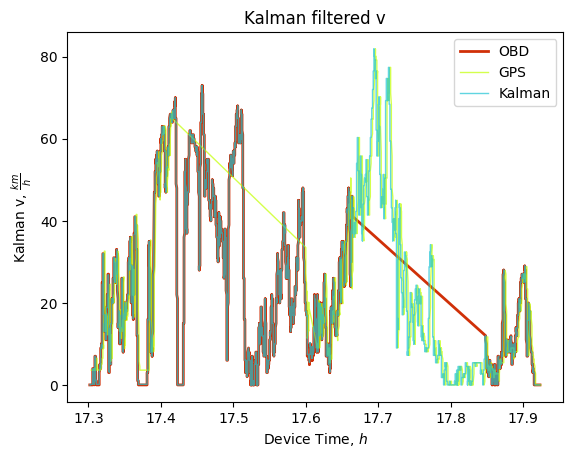

In [33]:
pass_symbols = ["-", "None", "nan","0.0","0"]
unit = 'h' #Единицы измерения
sigma2_e = 1
sigma2_obd = 0.4
sigma2_gps = 10
keys_F = {"x": df[data_accord["Engine RPM(rpm)"]].tolist()}
keys_B = {}
keys_z = {'Speed (OBD)(km/h)':[df[data_accord['Speed (OBD)(km/h)']],sigma2_obd],'Speed (GPS)(km/h)':[df[data_accord['Speed (GPS)(km/h)']],sigma2_gps]}

F = lambda k, i: float(k["x"][i])/float(k["x"][i-1])   if all([str(k[n][i-j]) not in pass_symbols for n in k for j in range(0, 2)]) else 1
B = lambda k, i: 0    if all([str(k[n][i-j]) not in pass_symbols for n in k for j in range(0, 2)]) else 0

kalman = Kalman(sigma2_e,F, keys_F, B, keys_B, keys_z)


#OBD
df1 = df[df[data_accord['Speed (OBD)(km/h)']] != '-']
x = list(map(pull_time,df1[data_accord['Device Time']].tolist(),repeat(unit),repeat(3)))
y = list(map(float,df[df[data_accord['Speed (OBD)(km/h)']] != pass_symbol[0]][data_accord['Speed (OBD)(km/h)']].tolist()))

plt.plot(x,y, color='#D03008', linewidth= 2,alpha = 1,label = 'OBD')

#GPS
df2 = df[df[data_accord['Speed (GPS)(km/h)']] != '-']
x = list(map(pull_time,df2[data_accord['GPS Time']].tolist(),repeat(unit),repeat(3)))
y = list(map(round,list(map(float,df2[data_accord['Speed (GPS)(km/h)']].tolist())),repeat(2)))

plt.plot(x,y, color='#c3ff00', linewidth= 1,alpha = 0.7,label = 'GPS')

y = kalman.do()[0]
x = list(map(pull_time,df[data_accord['Device Time']].tolist(),repeat(unit),repeat(3)))
plt.plot(x,y, color='#1cc4d4',linewidth= 1,alpha = 0.7, label = 'Kalman')
plt.xlabel(r'Device Time, $h$') #Подпись для оси х
plt.ylabel(r'Kalman v, $\frac{km}{h}$') #Подпись для оси y
plt.title('Kalman filtered v') #Название
plt.legend()


plt.show()